In [1]:
import re
from collections import defaultdict
import jsonpickle
from proquest_text_parser import *

# Dict keys
- Full text: 
    - Followed by `Subject:`
- Title: 
- Publication date:
- Publisher:
- Publication title:
- Source type:
- Document type:

Derive:
- ID: {initials of titles + pub_title initials + publication date} 


# Main

# Analyse media

### Media counting

In [2]:
with open("./data/pickle_240227/voice.pickle") as voice_file:
    voice_dict = jsonpickle.decode(voice_file.read())

### Manually delete non-Australian media, and group media for each states.

### Create target media list. 

In [4]:
pub_title_count = defaultdict(int)
for k,v in voice_dict.items():
    pub_title_count[v["pub_title"]] += 1

ptc_sorted = sorted(pub_title_count.items(), key=lambda x: x[1], reverse=True)

In [5]:
target_media = (
    # ABC assume national reach. 230 articles.
    ('ABC Premium News; Sydney', 'neutral', 'national'),
    ('7.30; Sydney', 'neutral', 'national'),

    # ACT. 951 articles. But Australian prolly national reach.
    # ('The Australian (Online); Canberra, A.C.T.', 'right', 'national'),
    ('The Canberra Times; Canberra, A.C.T.', 'left', 'ACT'),
    
    # NSW
    ('News.com.au; Sydney, N.S.W.', 'right', 'national'),
    ('Sydney Morning Herald; Sydney, N.S.W.', 'left', 'NSW'),
    ('Sun-Herald; Sydney, N.S.W.', 'left', 'NSW'),
    ('The Daily Telegraph (Online); Surrey Hills, N.S.W.', 'right', 'NSW'),

    # VIC
    ('The Age; Melbourne, Vic.', 'left', 'VIC'),
    ('Herald Sun; Melbourne, Vic.', 'left', 'VIC'),
    ('Sunday Age; Melbourne, Vic.', 'left', 'VIC'),

    # SA
    ('The Advertiser; Adelaide, S. Aust.', 'right', 'SA'),
    
    # QLD
    ('The Courier - Mail; Brisbane, Qld.', 'right', 'QLD'),
    ('The Cairns Post; Cairns, Qld.', 'right', 'QLD'),
    
    # NT
    ('The Northern Territory News; Darwin, N.T.', 'unclear', 'NT'),

    # TAS
    ('Advocate; Burnie, Tas.', 'unclear', 'TAS'),
    ('The Examiner; Launceston, Tas.', 'unclear', 'TAS'),
    ('The Mercury (Online); Hobart Town', 'unclear', 'TAS'),
)

# Quick check handcrafted attribute.
# set(c for a,b,c in target_media)

Some notes for the hand-crafted target_media list above:
- Some states only have major media with one editorial stance.

### Apply eMFD on media

In [ ]:
!pip install spacy==3.4.0
!pip install https://github.com/medianeuroscience/emfdscore/archive/master.zip
!python -m spacy download en_core_web_sm

In [7]:
from emfdscore.scoring import score_docs
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
print(f"spaCy version: {spacy.__version__}")
print(f"Pandas version: {pd.__version__}")


spaCy version: 3.4.0
Pandas version: 1.5.1


In [9]:
voice_keys = list(voice_dict.keys())
voice_text = [voice_dict[k]['text'] for k in voice_keys]

df_voice = pd.DataFrame.from_dict({0: voice_text}, dtype="string")
# df_voice = pd.read_csv('emfdscore/template_input.csv', header=None)

In [10]:
num_docs = len(df_voice)

DICT_TYPE = 'mfd'
PROB_MAP = ''
SCORE_METHOD = 'bow'
OUT_METRICS = ''
OUT_CSV_PATH = 'all-sent-mfd.csv'

df = score_docs(df_voice,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)


Processed: 0   0% |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
Processed: 1   0% |                      | Elapsed Time: 0:00:00 ETA:   0:13:01
Processed: 3   0% |                      | Elapsed Time: 0:00:00 ETA:   0:07:04
Processed: 4   0% |                      | Elapsed Time: 0:00:00 ETA:   0:08:15
Processed: 6   0% |                      | Elapsed Time: 0:00:00 ETA:   0:08:18
Processed: 7   0% |                      | Elapsed Time: 0:00:00 ETA:   0:08:29
Processed: 11   0% |                     | Elapsed Time: 0:00:00 ETA:   0:06:40
Processed: 12   0% |                     | Elapsed Time: 0:00:01 ETA:   0:06:46
Processed: 15   0% |                     | Elapsed Time: 0:00:01 ETA:   0:05:55
Processed: 17   0% |                     | Elapsed Time: 0:00:01 ETA:   0:05:43
Processed: 19   0% |                     | Elapsed Time: 0:00:01 ETA:   0:05:40
Processed: 20   0% |                     | Elapsed Time: 0:00:01 ETA:   0:06:21
Processed: 21   0% |                    

In [11]:
df

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
0,0.041667,0.041667,0.208333,0.500000,0.000000,0.083333,0.000000,0.041667,0.000000,0.000000,0.166667,0.044693,0.024614
1,0.000000,0.066667,0.400000,0.244444,0.000000,0.133333,0.022222,0.000000,0.044444,0.044444,0.088889,0.060241,0.017235
2,0.000000,0.000000,0.285714,0.285714,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.029915,0.019048
3,0.050000,0.100000,0.600000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.081301,0.035000
4,0.034483,0.275862,0.172414,0.241379,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.379310,0.039835,0.011640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,0.000000,0.000000,0.705882,0.235294,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.082524,0.050788
4537,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032407,0.100000
4538,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032407,0.100000
4539,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.030556


In [12]:
voice_dates = [voice_dict[k]['date'] for k in voice_keys]
df['date'] = voice_dates
df['date'] = df['date'].apply(lambda x: '-'.join([x[:4], x[4:6], x[6:]]) if x else None)
df['date'] = pd.to_datetime(df['date'])

#### Media analysis with binary editorial stance

##### Macro average

In [13]:
df['id'] = voice_keys
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
df.head()

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var,date,id,pub_title
0,0.041667,0.041667,0.208333,0.500000,0.000000,0.083333,0.000000,0.041667,0.000000,0.000000,0.166667,0.044693,0.024614,2023-11-19,IvtpreaLh-TA(CA-20231119,"The Australian (Online); Canberra, A.C.T."
1,0.000000,0.066667,0.400000,0.244444,0.000000,0.133333,0.022222,0.000000,0.044444,0.044444,0.088889,0.060241,0.017235,2023-10-31,WtIVtPrfSftIVtPwisswdtrf-7S-20231031,7.30; Sydney
2,0.000000,0.000000,0.285714,0.285714,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.029915,0.019048,2023-10-30,SGlIvtprd‘fietsN-TA(CA-20231030,"The Australian (Online); Canberra, A.C.T."
3,0.050000,0.100000,0.600000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.081301,0.035000,2023-10-23,QclvtpfrAc-TA(CA-20231023,"The Australian (Online); Canberra, A.C.T."
4,0.034483,0.275862,0.172414,0.241379,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.379310,0.039835,0.011640,2023-10-18,VsNtaIvtpbAAsil-TA(CA-20231018,"The Australian (Online); Canberra, A.C.T."


In [14]:
df_pub_title = df.groupby(['pub_title']).mean()
# df_pub_title = df.groupby(['pub_title']).agg({
#     f'{k}_score': ['mean', 'count'] for k in foundations
# })
df_pub_title

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
pub_title,,,,,,,,,,,,,
7.30; Sydney,0.023342,0.109425,0.466724,0.140609,0.002928,0.088945,0.027190,0.010293,0.005875,0.011857,0.108524,0.035281,0.031017
AAP Bulletin Wire; Sydney,0.037228,0.063527,0.441736,0.304656,0.005213,0.035618,0.009335,0.013724,0.021516,0.004954,0.100172,0.042737,0.036730
AAP General News Wire; Sydney,0.034604,0.060681,0.467294,0.285895,0.006114,0.038026,0.011583,0.010858,0.020970,0.005572,0.093232,0.043446,0.039047
AAP Sports News Wire; Sydney,0.027778,0.125165,0.361276,0.220569,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.209656,0.044614,0.019509
ABC Premium News; Sydney,0.049982,0.073923,0.467009,0.234547,0.007796,0.045937,0.010855,0.019967,0.017799,0.012622,0.086453,0.046803,0.035271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westside News; Milton, Qld.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
World Report; Toronto,0.000000,0.000000,0.772727,0.136364,0.000000,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,0.058841,0.066024
Yerepouni Daily News; Beirut,0.000000,0.076923,0.461538,0.307692,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.076923,0.032258,0.025049


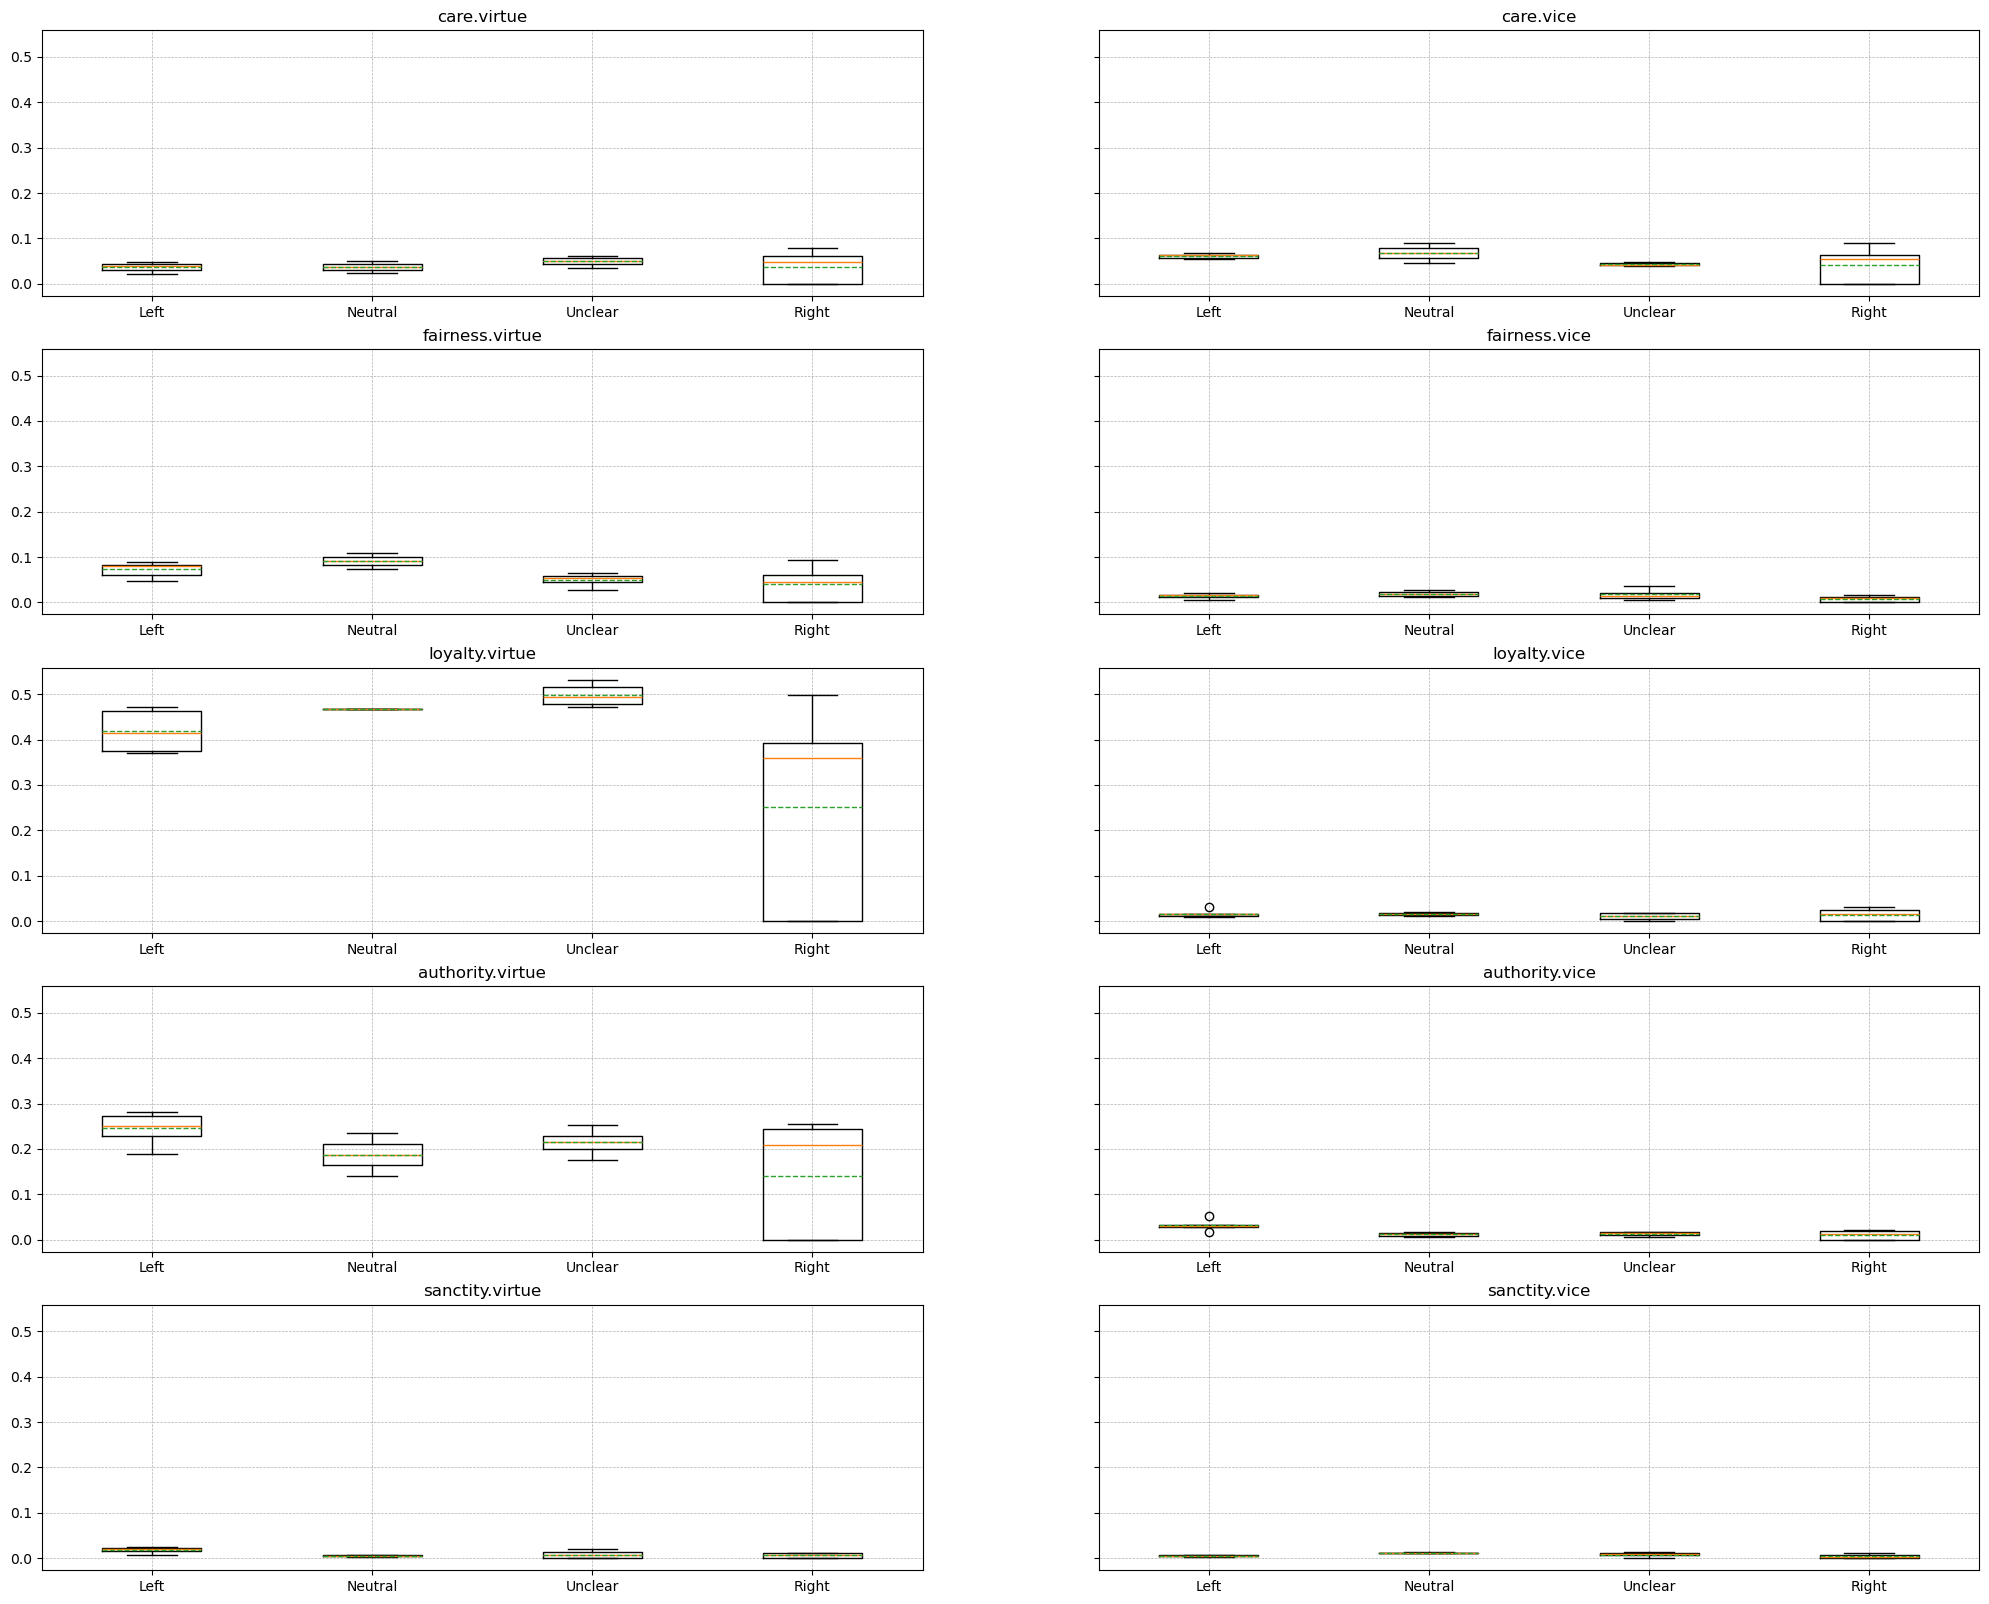

In [15]:
# Pick out targeted media.
target_indices = [media_data[0] for media_data in target_media]
df_pub_title_filtered = df_pub_title.loc[target_indices]
# Map pub_title to number.
pub_title_list = df_pub_title_filtered.index

df_pub_title_filtered['edit_stance'] = None
df_pub_title_filtered['state'] = None

# Add editorial stances and states of media
for i in range(len(target_media)):
    name, edit_stance, state = target_media[i]
    df_pub_title_filtered.at[name,'edit_stance'] = edit_stance
    df_pub_title_filtered.at[name, 'state'] = state

foundations = [
    ('care.virtue', 'care.vice'), 
    ('fairness.virtue', 'fairness.vice'), 
    ('loyalty.virtue', 'loyalty.vice'), 
    ('authority.virtue', 'authority.vice'), 
    ('sanctity.virtue', 'sanctity.vice')]

df_pub_title_filtered.reset_index(inplace=True)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(25, 20), sharey=True)

for i in range(0, len(foundations)):
    f_virtue = foundations[i][0]
    f_vice = foundations[i][1]
    for j in range(2):
        mf = f_virtue if j==0 else f_vice
        axs[i][j].boxplot([
            df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='left'][mf],
            df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='neutral'][mf],
            df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='unclear'][mf],
            df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='right'][mf],
        ], meanline=True, showmeans=True)

        axs[i][j].set_title(mf)
        axs[i][j].set_xticklabels(['Left', 'Neutral', 'Unclear', 'Right'])

        # Config grids
        axs[i][j].grid(linestyle='--', linewidth=0.5)

plt.show()


In [17]:
df_pub_title_filtered.groupby('edit_stance').sum()

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
edit_stance,,,,,,,,,,,,,
left,0.220873,0.434777,2.512254,1.472329,0.110097,0.367926,0.084779,0.094879,0.189955,0.032530,0.630414,0.259432,0.186238
neutral,0.073324,0.183348,0.933732,0.375156,0.010724,0.134882,0.038044,0.030259,0.023673,0.024479,0.194977,0.082084,0.066288
right,0.186940,0.199598,1.251260,0.705456,0.030900,0.208140,0.038204,0.068410,0.052963,0.020913,0.277858,0.129564,0.101274
unclear,0.197576,0.200335,1.994149,0.856542,0.031972,0.171043,0.069977,0.041644,0.049565,0.032099,0.442776,0.157072,0.156305


In [25]:
df_pub_title_filtered.groupby('edit_stance').sum().sort_values(('authority.virtue'), ascending=False)

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
edit_stance,,,,,,,,,,,,,
left,0.220873,0.434777,2.512254,1.472329,0.110097,0.367926,0.084779,0.094879,0.189955,0.032530,0.630414,0.259432,0.186238
unclear,0.197576,0.200335,1.994149,0.856542,0.031972,0.171043,0.069977,0.041644,0.049565,0.032099,0.442776,0.157072,0.156305
right,0.186940,0.199598,1.251260,0.705456,0.030900,0.208140,0.038204,0.068410,0.052963,0.020913,0.277858,0.129564,0.101274
neutral,0.073324,0.183348,0.933732,0.375156,0.010724,0.134882,0.038044,0.030259,0.023673,0.024479,0.194977,0.082084,0.066288


##### Micro average

In [315]:
def pub2stance(pub, media_data):
    for i in range(len(media_data)):
        if media_data[i][0] == pub:
            return media_data[i][1]
    print("Unexpected behavior.")
    return None

In [319]:
df['id'] = voice_keys
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
# df.to_csv(OUT_CSV_PATH, index=False)

foundations = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

for f in foundations:
    df[f'{f}_score'] = df[f'{f}_p'] * df[f'{f}_sent']

# Add editorial stances and states of media
for i in range(len(target_media)):
    name, edit_stance, state = target_media[i]
    df['edit_stance'] = df['pub_title'].apply(pub2stance, args=[target_media])

# 'Unexpected behavior' expected because in the micro method media is not filtered.

Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected behavior.
Unexpected be

In [323]:
df_micro_stance = df.groupby(['edit_stance']).agg({
    f'{k}_score': ['mean', 'count'] for k in foundations
})
df_micro_stance.reset_index(inplace=True)

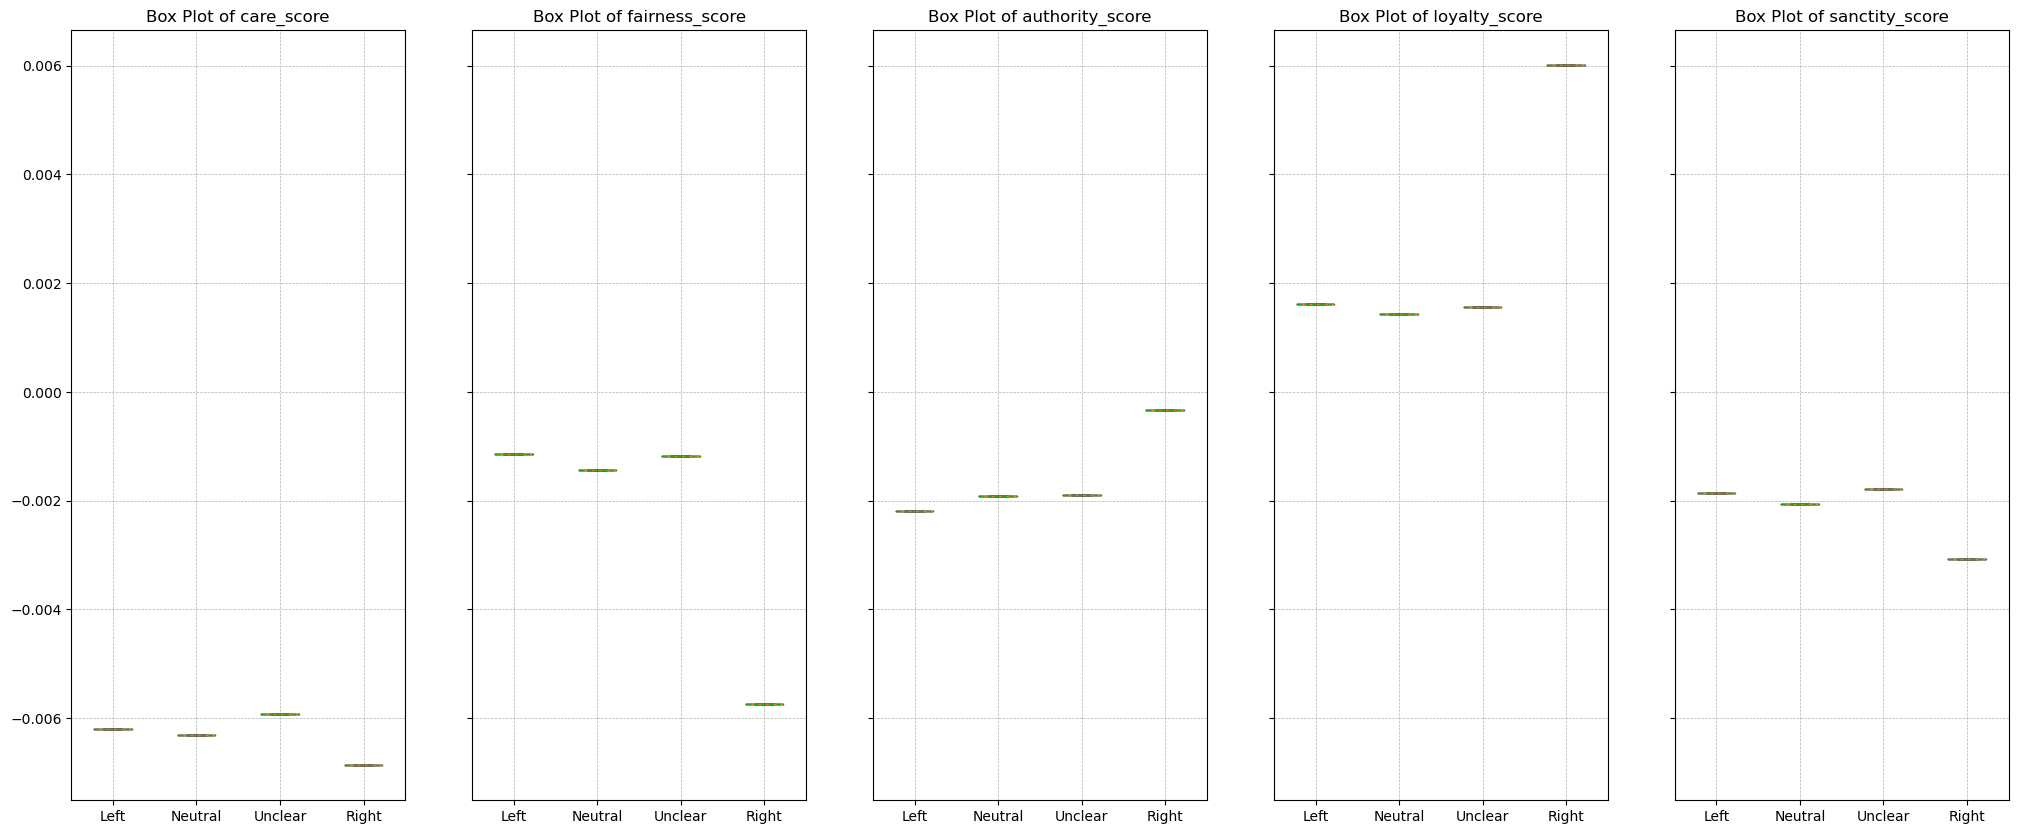

In [324]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].boxplot([
        df_micro_stance[df_micro_stance['edit_stance']=='left'][f'{f}_score']['mean'],
        df_micro_stance[df_micro_stance['edit_stance']=='neutral'][f'{f}_score']['mean'],
        df_micro_stance[df_micro_stance['edit_stance']=='unclear'][f'{f}_score']['mean'],
        df_micro_stance[df_micro_stance['edit_stance']=='right'][f'{f}_score']['mean'],
    ], meanline=True, showmeans=True)

    axs[i].set_title(f'Box Plot of {f}_score')
    axs[i].set_xticklabels(['Left', 'Neutral', 'Unclear', 'Right'])

    # Config grids
    axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

#### Time series

In [325]:
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
foundations = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

for f in foundations:
    df[f'{f}_score'] = df[f'{f}_p'] * df[f'{f}_sent']
    
def pub2stance(pub, media_data):
    for i in range(len(media_data)):
        if media_data[i][0] == pub:
            return media_data[i][1]
    print("Unexpected behavior.")
    return None

# Add editorial stances and states of media
df['edit_stance'] = df['pub_title'].apply(pub2stance, args=(target_media, ))
df_stance_ts = df.groupby(['edit_stance', 'date']).mean()
df_stance_ts.reset_index(inplace=True)

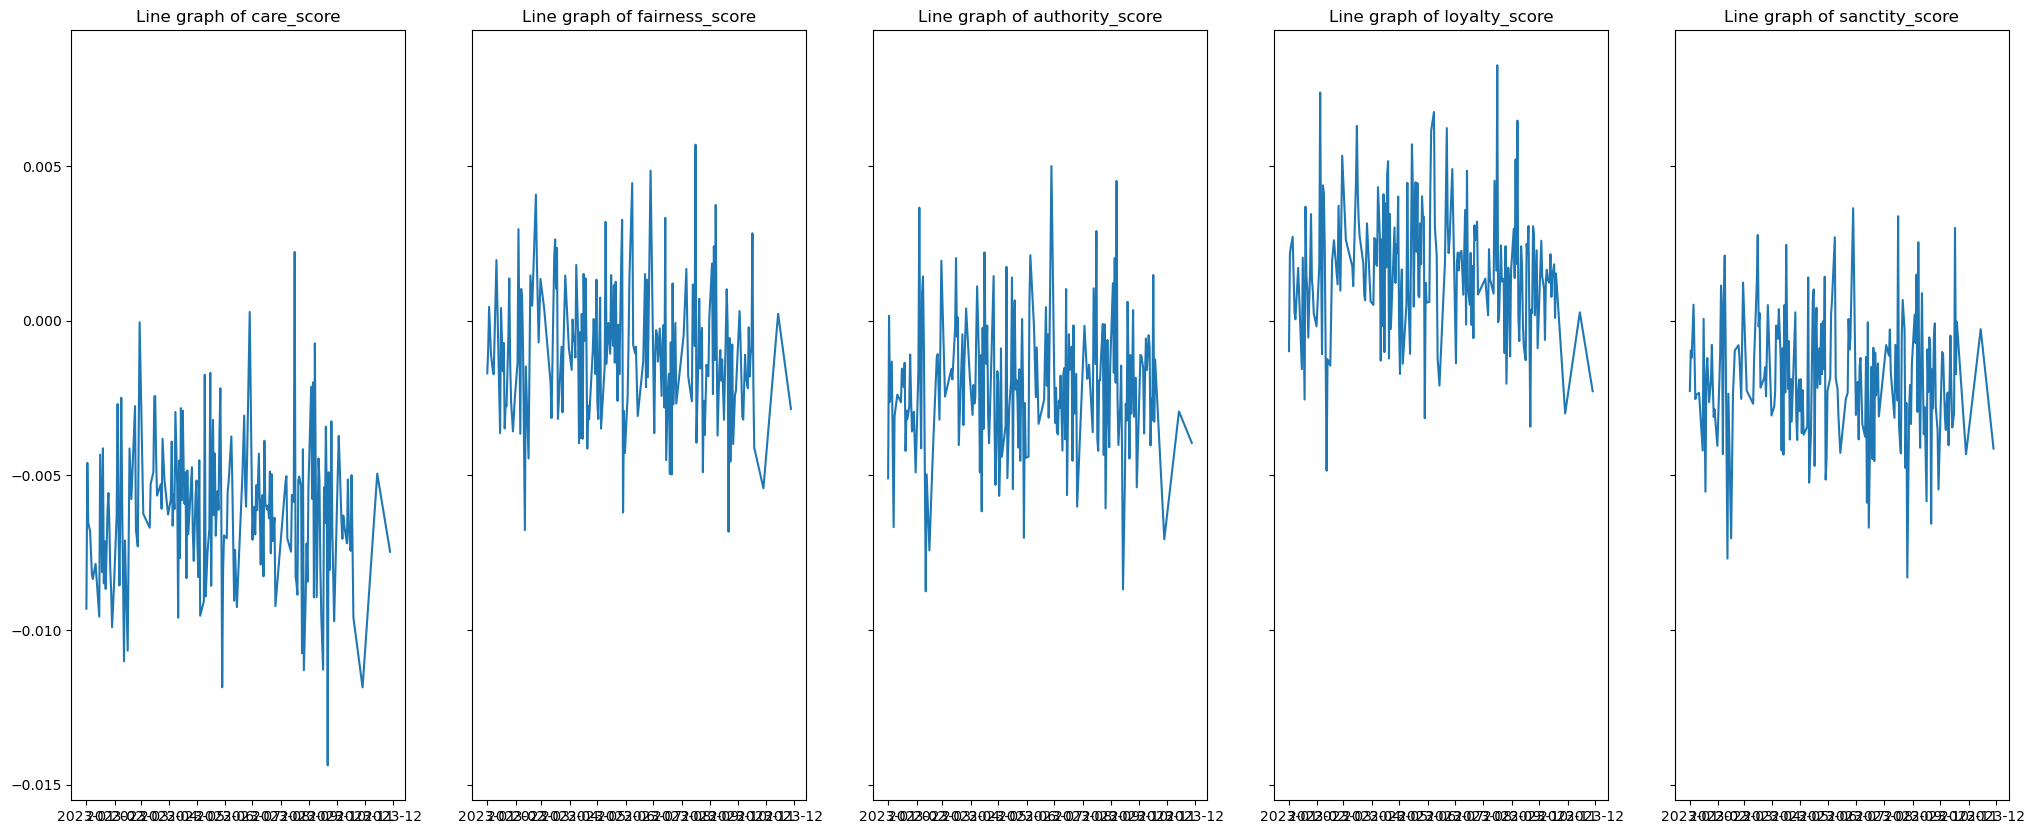

In [337]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].plot(df_stance_ts[df_stance_ts['edit_stance']=='left']["date"], 
        df_stance_ts[df_stance_ts['edit_stance']=='left'][f'{f}_score'], 
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='neutral'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='unclear'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='right'][f'{f}_score']['mean'],
    )

    axs[i].set_title(f'Line graph of {f}_score')
    
    # Config grids
    # axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

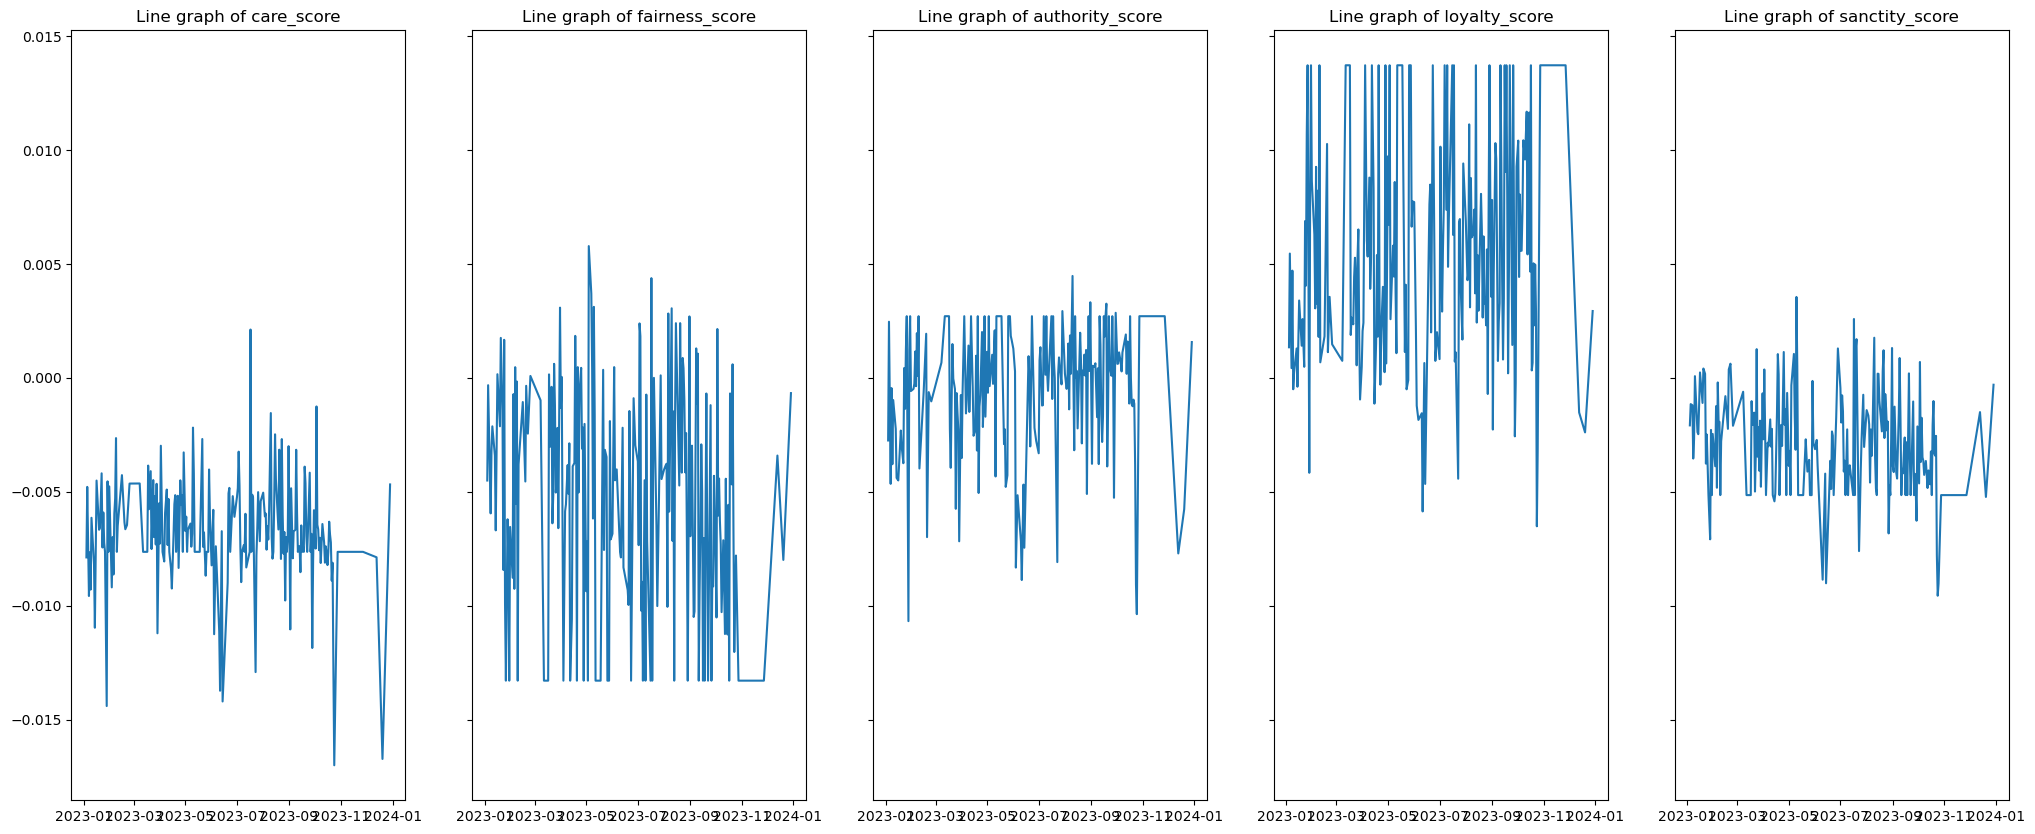

In [338]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 10), sharey=True)

foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for i in range(5):
    f = foundations[i]
    axs[i].plot(df_stance_ts[df_stance_ts['edit_stance']=='right']["date"], 
        df_stance_ts[df_stance_ts['edit_stance']=='right'][f'{f}_score'], 
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='neutral'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='unclear'][f'{f}_score']['mean'],
        # df_pub_title_filtered[df_pub_title_filtered['edit_stance']=='right'][f'{f}_score']['mean'],
    )

    axs[i].set_title(f'Line graph of {f}_score')
    
    # Config grids
    # axs[i].grid(linestyle='--', linewidth=0.5)

plt.show()

#### State wise analysis

In [26]:
df

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var,date,id,pub_title
0,0.041667,0.041667,0.208333,0.500000,0.000000,0.083333,0.000000,0.041667,0.000000,0.000000,0.166667,0.044693,0.024614,2023-11-19,IvtpreaLh-TA(CA-20231119,"The Australian (Online); Canberra, A.C.T."
1,0.000000,0.066667,0.400000,0.244444,0.000000,0.133333,0.022222,0.000000,0.044444,0.044444,0.088889,0.060241,0.017235,2023-10-31,WtIVtPrfSftIVtPwisswdtrf-7S-20231031,7.30; Sydney
2,0.000000,0.000000,0.285714,0.285714,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.029915,0.019048,2023-10-30,SGlIvtprd‘fietsN-TA(CA-20231030,"The Australian (Online); Canberra, A.C.T."
3,0.050000,0.100000,0.600000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.081301,0.035000,2023-10-23,QclvtpfrAc-TA(CA-20231023,"The Australian (Online); Canberra, A.C.T."
4,0.034483,0.275862,0.172414,0.241379,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.379310,0.039835,0.011640,2023-10-18,VsNtaIvtpbAAsil-TA(CA-20231018,"The Australian (Online); Canberra, A.C.T."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,0.000000,0.000000,0.705882,0.235294,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.082524,0.050788,2023-01-04,CbNvo-AGNWS-20230104,AAP General News Wire; Sydney
4537,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032407,0.100000,2023-01-03,Iv'wo-AGNWS-20230103,AAP General News Wire; Sydney
4538,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032407,0.100000,2023-01-03,Iv'wo-ABWS-20230103,AAP Bulletin Wire; Sydney
4539,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.030556,2023-01-01,TfIvvr-ABWS-20230101,AAP Bulletin Wire; Sydney


In [30]:
df['id'] = voice_keys
df['pub_title'] = [voice_dict[id]['pub_title'] for id in voice_keys]
df

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var,date,id,pub_title
0,0.041667,0.041667,0.208333,0.500000,0.000000,0.083333,0.000000,0.041667,0.000000,0.000000,0.166667,0.044693,0.024614,2023-11-19,IvtpreaLh-TA(CA-20231119,"The Australian (Online); Canberra, A.C.T."
1,0.000000,0.066667,0.400000,0.244444,0.000000,0.133333,0.022222,0.000000,0.044444,0.044444,0.088889,0.060241,0.017235,2023-10-31,WtIVtPrfSftIVtPwisswdtrf-7S-20231031,7.30; Sydney
2,0.000000,0.000000,0.285714,0.285714,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.029915,0.019048,2023-10-30,SGlIvtprd‘fietsN-TA(CA-20231030,"The Australian (Online); Canberra, A.C.T."
3,0.050000,0.100000,0.600000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.081301,0.035000,2023-10-23,QclvtpfrAc-TA(CA-20231023,"The Australian (Online); Canberra, A.C.T."
4,0.034483,0.275862,0.172414,0.241379,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.379310,0.039835,0.011640,2023-10-18,VsNtaIvtpbAAsil-TA(CA-20231018,"The Australian (Online); Canberra, A.C.T."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,0.000000,0.000000,0.705882,0.235294,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.082524,0.050788,2023-01-04,CbNvo-AGNWS-20230104,AAP General News Wire; Sydney
4537,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032407,0.100000,2023-01-03,Iv'wo-AGNWS-20230103,AAP General News Wire; Sydney
4538,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032407,0.100000,2023-01-03,Iv'wo-ABWS-20230103,AAP Bulletin Wire; Sydney
4539,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.030556,2023-01-01,TfIvvr-ABWS-20230101,AAP Bulletin Wire; Sydney


In [31]:
# Pick out targeted media.
target_indices = [media_data[0] for media_data in target_media]
pub_filter_list = [df['pub_title'] == target_indices[i] for i in range(len(target_indices))]
pub_filter = pub_filter_list[0]
for i in range(1,len(pub_filter_list)):
    pub_filter = pub_filter | pub_filter_list[i]

df_pub_title_filtered = df[pub_filter]

In [32]:
def pub2state(pub, media_data):
    for i in range(len(media_data)):
        if media_data[i][0] == pub:
            return media_data[i][2]
    print("Unexpected behavior.")
    return None

# Add editorial stances and states of media
df_pub_title_filtered['state'] = df_pub_title_filtered['pub_title'].apply(pub2state, args=(target_media, ))

/var/folders/4y/tpc_50fx70d6w16f55qld9fw0000gn/T/ipykernel_30806/216365967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pub_title_filtered['state'] = df_pub_title_filtered['pub_title'].apply(pub2state, args=(target_media, ))


In [37]:
df_state = df_pub_title_filtered.groupby(['state']).mean()
df_state

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
state,,,,,,,,,,,,,
ACT,0.029571,0.082574,0.443397,0.222682,0.015047,0.054770,0.016622,0.015825,0.027482,0.007140,0.114362,0.043115,0.033831
NSW,0.060089,0.082935,0.375300,0.255000,0.017624,0.062776,0.013950,0.018181,0.029394,0.007697,0.105324,0.042135,0.028923
NT,0.046824,0.051464,0.480284,0.253463,0.010733,0.048529,0.016410,0.006722,0.015436,0.007999,0.079999,0.041476,0.041315
QLD,0.032602,0.024126,0.208811,0.135348,0.006026,0.048004,0.008968,0.016099,0.009907,0.003285,0.038637,0.024989,0.015866
SA,0.046821,0.060080,0.498801,0.207827,0.007069,0.055040,0.009348,0.014377,0.013044,0.003517,0.094140,0.044153,0.042100
TAS,0.054530,0.044816,0.495968,0.208979,0.003318,0.041602,0.020217,0.015129,0.010874,0.010398,0.115971,0.037754,0.038820
VIC,0.040823,0.080622,0.392093,0.266889,0.021812,0.060397,0.015907,0.016405,0.025654,0.005155,0.106150,0.045855,0.030409
national,0.028611,0.048759,0.288717,0.136935,0.004402,0.032101,0.008116,0.011513,0.009979,0.007738,0.055351,0.027946,0.021441


In [40]:
df_state.sort_values(('care.vice'), ascending=False)

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
state,,,,,,,,,,,,,
NSW,0.060089,0.082935,0.375300,0.255000,0.017624,0.062776,0.013950,0.018181,0.029394,0.007697,0.105324,0.042135,0.028923
VIC,0.040823,0.080622,0.392093,0.266889,0.021812,0.060397,0.015907,0.016405,0.025654,0.005155,0.106150,0.045855,0.030409
SA,0.046821,0.060080,0.498801,0.207827,0.007069,0.055040,0.009348,0.014377,0.013044,0.003517,0.094140,0.044153,0.042100
ACT,0.029571,0.082574,0.443397,0.222682,0.015047,0.054770,0.016622,0.015825,0.027482,0.007140,0.114362,0.043115,0.033831
NT,0.046824,0.051464,0.480284,0.253463,0.010733,0.048529,0.016410,0.006722,0.015436,0.007999,0.079999,0.041476,0.041315
QLD,0.032602,0.024126,0.208811,0.135348,0.006026,0.048004,0.008968,0.016099,0.009907,0.003285,0.038637,0.024989,0.015866
TAS,0.054530,0.044816,0.495968,0.208979,0.003318,0.041602,0.020217,0.015129,0.010874,0.010398,0.115971,0.037754,0.038820
national,0.028611,0.048759,0.288717,0.136935,0.004402,0.032101,0.008116,0.011513,0.009979,0.007738,0.055351,0.027946,0.021441


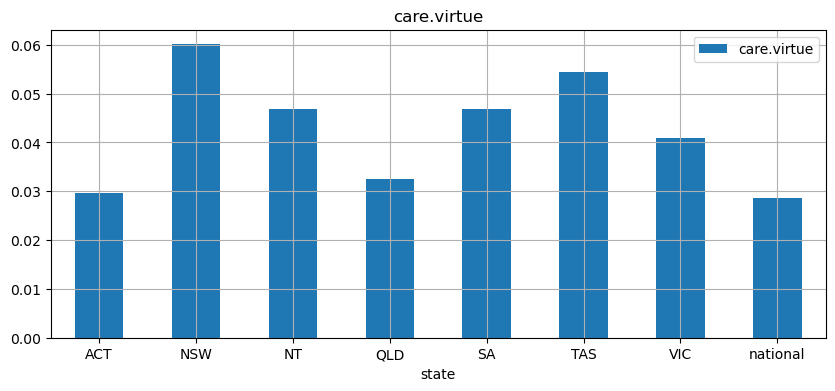

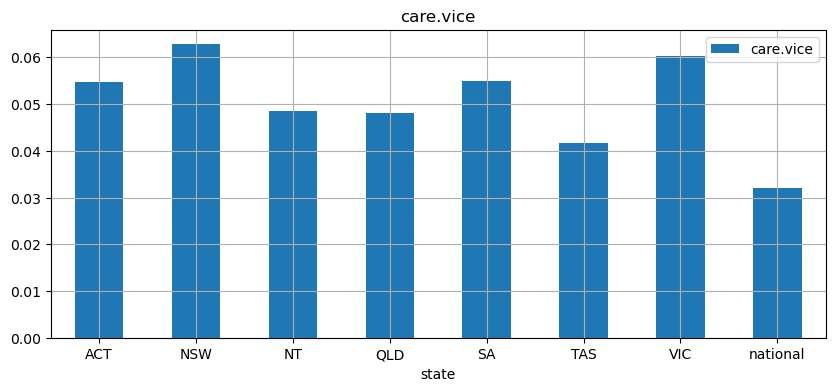

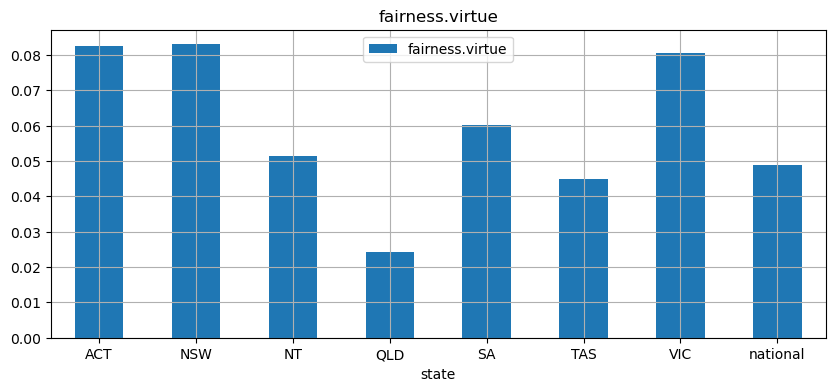

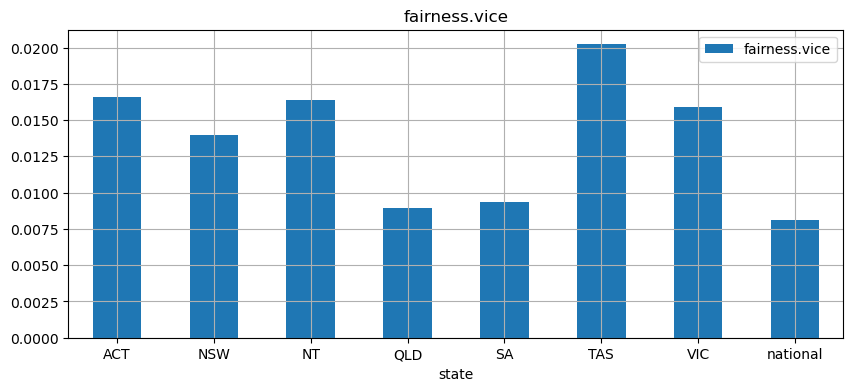

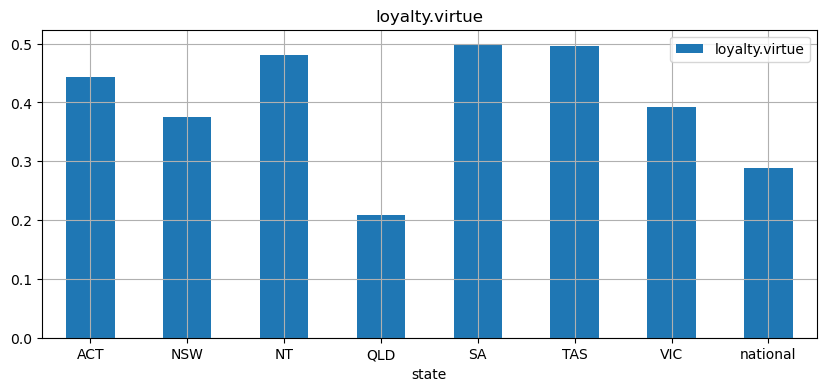

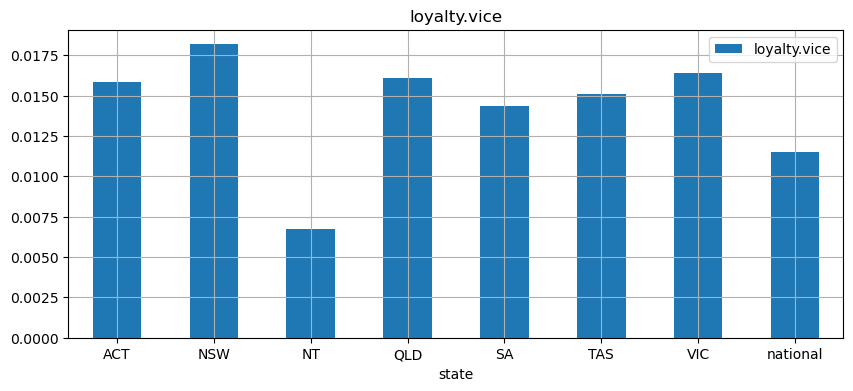

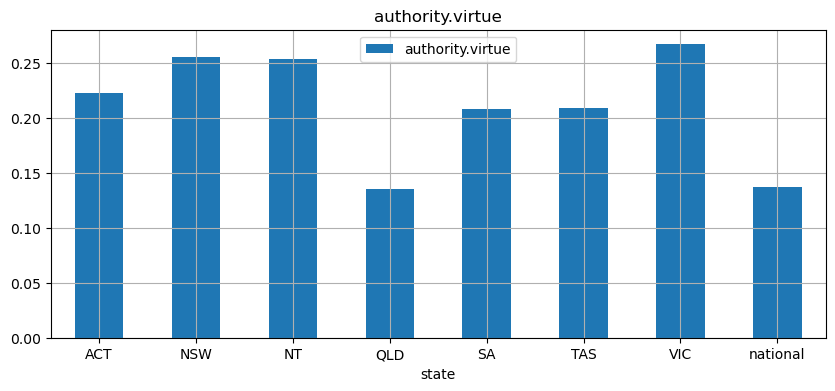

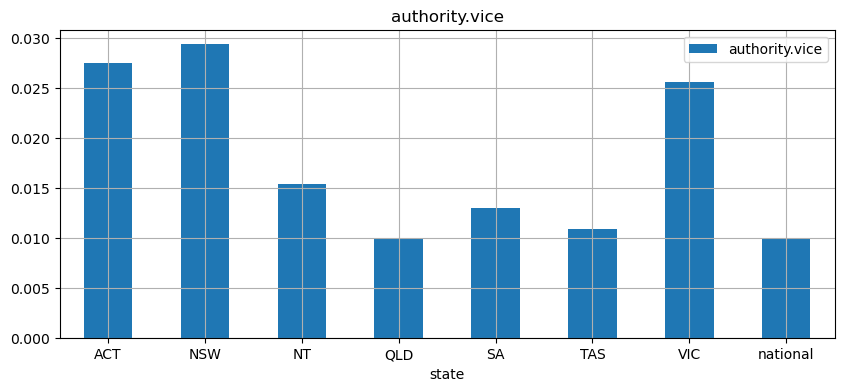

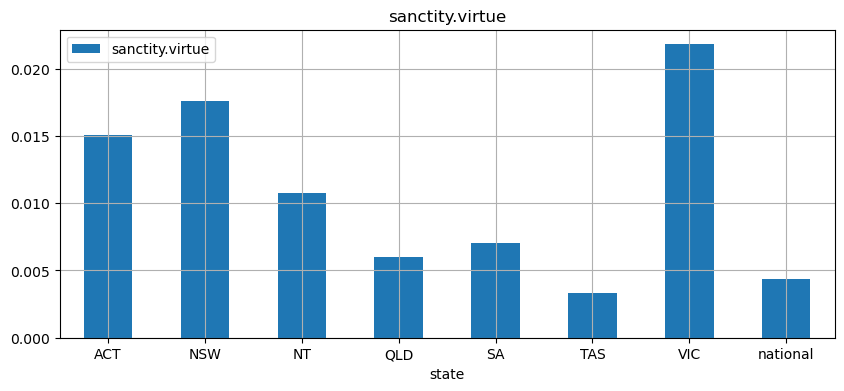

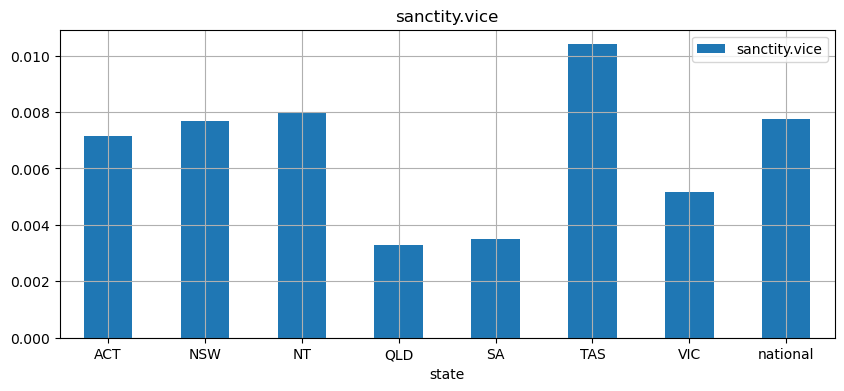

In [43]:
foundations = ['care.virtue', 'care.vice', 'fairness.virtue', 'fairness.vice', 'loyalty.virtue', 'loyalty.vice', 'authority.virtue', 'authority.vice', 'sanctity.virtue', 'sanctity.vice']
for f in foundations:
    df_state.plot.bar(rot=0, y=f, subplots=True, figsize=(10, 4), grid=True)